In [30]:
#Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
#Read dataset

df = pd.read_csv('media prediction and its cost.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

Dataset ini memiliki sekitar 60.428 entri dan 40 kolom, dengan informasi terperinci mengenai produk makanan, penjualan toko, biaya toko, informasi demografi pelanggan, dan kolom biaya target yang akan coba diprediksi.

In [32]:
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


Membuat data frame baru dengan hanya menggunakan data negara Amerika Serikat.

In [33]:
df_usa = df.loc[df['sales_country']=='USA']
df_usa = df_usa.drop(['sales_country'], axis =1)
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38892 entries, 0 to 60425
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               38892 non-null  object 
 1   food_department             38892 non-null  object 
 2   food_family                 38892 non-null  object 
 3   store_sales(in millions)    38892 non-null  float64
 4   store_cost(in millions)     38892 non-null  float64
 5   unit_sales(in millions)     38892 non-null  float64
 6   promotion_name              38892 non-null  object 
 7   marital_status              38892 non-null  object 
 8   gender                      38892 non-null  object 
 9   total_children              38892 non-null  float64
 10  education                   38892 non-null  object 
 11  member_card                 38892 non-null  object 
 12  occupation                  38892 non-null  object 
 13  houseowner                  38892 no

# Data Cleaning


In [34]:
df_usa.isnull().sum()

,0
food_category,0
food_department,0
food_family,0
store_sales(in millions),0
store_cost(in millions),0
unit_sales(in millions),0
promotion_name,0
marital_status,0
gender,0
total_children,0


Dapat dilihat bahwa data yang digunakan sudah bersih, sehingga tidak perlu melakukan cleaning data.

#Exploratory Data Analysis (EDA)

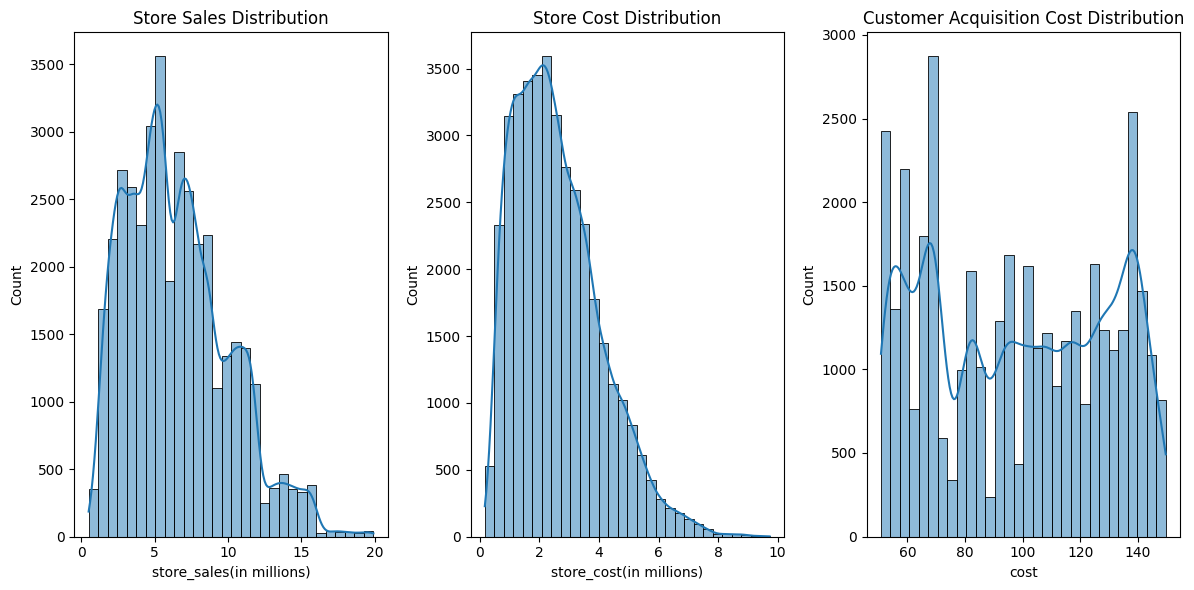

In [35]:
#Plot the distribution of 'store_sales(in millions)', 'store_cost(in millions)', and 'cost'
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df_usa['store_sales(in millions)'], bins=30, kde=True)
plt.title('Store Sales Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df_usa['store_cost(in millions)'], bins=30, kde=True)
plt.title('Store Cost Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df_usa['cost'], bins=30, kde=True)
plt.title('Customer Acquisition Cost Distribution')

plt.tight_layout()
plt.show()

Berdasarkan hasil plot ditribusi diatas dapat dilihat bahwa:
- Distribusi Penjualan Toko
   - Distribusi `store_sales (in millions)` menunjukkan bahwa sebagian besar toko memiliki penjualan berkisar antara **3 hingga 7 juta**.
   - Ada beberapa toko dengan penjualan hingga **20 juta**, tetapi ini lebih jarang terjadi, seperti yang ditunjukkan oleh ekor panjang di sebelah kanan.
   - Data ini agak **multimodal**, yang mengindikasikan bahwa ada kelompok toko yang berpotensi berbeda dengan pola penjualan yang berbeda.
- Distribusi Biaya Toko
   - Distribusi `store_cost (in millions)` adalah **condong ke kanan**, dengan sebagian besar toko memiliki biaya yang terkonsentrasi antara **1 hingga 3 juta**.
   - Penurunan tajam terlihat pada biaya yang lebih tinggi, yang mengindikasikan bahwa hanya sedikit toko yang memiliki biaya melebihi **5 juta**.
   - Kecondongan ini menunjukkan bahwa ada banyak toko yang beroperasi dengan biaya rendah tetapi ada beberapa pencilan yang mengeluarkan biaya yang jauh lebih tinggi.
- Distribusi Biaya Akuisisi Pelanggan
  - Distribusi `cost` untuk mendapatkan pelanggan adalah **menyebar**, tanpa kecenderungan atau puncak yang jelas.
  - Biaya berkisar antara **50 hingga 150** unit, yang menunjukkan berbagai macam biaya akuisisi di berbagai toko atau pelanggan.
  - Adanya puncak-puncak ini dapat mengindikasikan bahwa beberapa kelompok pelanggan atau wilayah memiliki biaya akuisisi yang berbeda secara sistematis.

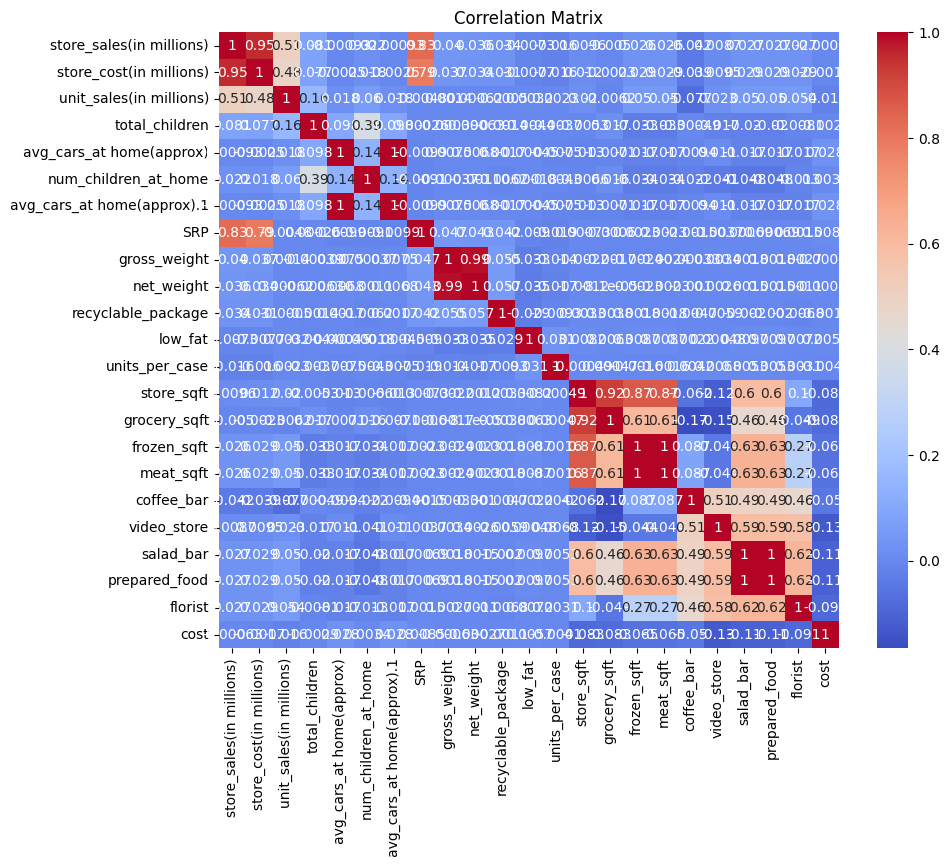

In [36]:
#Drop non-numeric columns for correlation calculation
df_numeric = df_usa.select_dtypes(include=[np.number])

#Checking correlation between numerical features
plt.figure(figsize=(10, 8))
corr = df_numeric.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- Terdapat korelasi positif yang tinggi (0,95) antara `store_sales(in millions)` dan `store_cost(in millions)`. Hal ini menunjukkan bahwa penjualan toko yang lebih tinggi sangat terkait dengan biaya toko yang lebih tinggi, yang diharapkan di sebagian besar bisnis r
- Korelasi antara `store_sales(in millions)` dan variabel target `cost` relatif rendah, sekitar **0,06**. Hal ini mengindikasikan bahwa penjualan toko saja mungkin bukan prediktor yang signifikan untuk biaya yang dibutuhkan untuk mendapatkan pelanggan.
- Demikian pula, `store_cost(in millions)` memiliki korelasi yang rendah yaitu **0,06** dengan `cost`. Hal ini menunjukkan bahwa biaya toko mungkin tidak secara langsung menjelaskan variasi biaya akuisisi pelanggan.
- Terdapat **korelasi yang sangat kuat** antara:
  - `gross_weight` dan `net_weight` (**0.99**), yang mengindikasikan bahwa keduanya hampir sama.
  - `meat_sqft`, `grocery_sqft`, `frozen_sqft`, `salad_bar`, dan `prepared_food` berkorelasi sedang, yang mengindikasikan bahwa fitur-fitur tersebut mungkin terkait dengan ukuran toko atau penempatan produk di toko tertentu.

# Data Preprocessing

Karena yang akan diprediksi adalah cost yang dibutuhkan untuk mendapatkan customer, maka mendrop column-column yang tidak relevan.







In [37]:
column_store= ['store_sales(in millions)', 'store_cost(in millions)', 'store_sqft' ]
df2 = df_usa.drop(column_store, axis=1)
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38892 entries, 0 to 60425
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               38892 non-null  object 
 1   food_department             38892 non-null  object 
 2   food_family                 38892 non-null  object 
 3   store_sales(in millions)    38892 non-null  float64
 4   store_cost(in millions)     38892 non-null  float64
 5   unit_sales(in millions)     38892 non-null  float64
 6   promotion_name              38892 non-null  object 
 7   marital_status              38892 non-null  object 
 8   gender                      38892 non-null  object 
 9   total_children              38892 non-null  float64
 10  education                   38892 non-null  object 
 11  member_card                 38892 non-null  object 
 12  occupation                  38892 non-null  object 
 13  houseowner                  38892 no

In [38]:
column_info = ['gender', 'total_children', 'marital_status','num_children_at_home', 'education', 'avg_cars_at home(approx)', 'avg. yearly_income', 'occupation', 'houseowner', 'avg_cars_at home(approx).1']
df3 = df2.drop(column_info, axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38892 entries, 0 to 60425
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   food_category            38892 non-null  object 
 1   food_department          38892 non-null  object 
 2   food_family              38892 non-null  object 
 3   unit_sales(in millions)  38892 non-null  float64
 4   promotion_name           38892 non-null  object 
 5   member_card              38892 non-null  object 
 6   brand_name               38892 non-null  object 
 7   SRP                      38892 non-null  float64
 8   gross_weight             38892 non-null  float64
 9   net_weight               38892 non-null  float64
 10  recyclable_package       38892 non-null  float64
 11  low_fat                  38892 non-null  float64
 12  units_per_case           38892 non-null  float64
 13  store_type               38892 non-null  object 
 14  store_city               38

In [39]:
column_food = ['food_category', 'food_department', 'food_family','brand_name', 'recyclable_package', 'low_fat']
df4 = df3.drop(column_food, axis=1)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38892 entries, 0 to 60425
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   unit_sales(in millions)  38892 non-null  float64
 1   promotion_name           38892 non-null  object 
 2   member_card              38892 non-null  object 
 3   SRP                      38892 non-null  float64
 4   gross_weight             38892 non-null  float64
 5   net_weight               38892 non-null  float64
 6   units_per_case           38892 non-null  float64
 7   store_type               38892 non-null  object 
 8   store_city               38892 non-null  object 
 9   store_state              38892 non-null  object 
 10  grocery_sqft             38892 non-null  float64
 11  frozen_sqft              38892 non-null  float64
 12  meat_sqft                38892 non-null  float64
 13  coffee_bar               38892 non-null  float64
 14  video_store              38

In [59]:
#Feature Engineering
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

target = 'cost'
features = ['member_card', 'SRP', 'gross_weight', 'net_weight', 'units_per_case', 'store_type', 'store_city', 'store_state', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar',
            'video_store', 'salad_bar', 'prepared_food', 'florist', 'media_type', 'cost']

df4[target] = label_encoder.fit_transform(df4[target])

for feature in features:
    if df4[feature].dtype == 'object':
        df4[feature] = label_encoder.fit_transform(df4[feature])

# Modeling

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
#Define features (X) and target (y)
X = df4[features]
y = df4[target]

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred_tree = decision_tree.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree Regressor - MSE: {mse_tree}, RMSE: {rmse_tree}, R²: {r2_tree}")

Decision Tree Regressor - MSE: 0.0, RMSE: 0.0, R²: 1.0


Hasil dari model Decision Tree Regressor dengan RMSE: 0.0 dan R²: 1.0 menunjukkan bahwa model tersebut memperoleh prediksi yang sempurna pada data uji, yang sering kali mengindikasikan overfitting.

In [63]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)

y_pred_forest = random_forest.predict(X_test)

mse_forest = mean_squared_error(y_test, y_pred_forest)
rmse_forest = np.sqrt(mse_forest)
r2_forest = r2_score(y_test, y_pred_forest )

print(f"Random Forest Regressor - MSE: {mse_forest}, RMSE: {rmse_forest}, R²: {r2_forest}")

Random Forest Regressor - MSE: 0.0, RMSE: 0.0, R²: 1.0


Hasil dari model Random Forest Regressor juga menunjukkan nilai yang serupa, sehingga dilakukan lah Hyperparameter Tuning.

In [45]:
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [47]:
#Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [48]:
#Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid,
                                   n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
78 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, verbose=2)

In [49]:
#Get the best estimator
best_rf = random_search.best_estimator_

In [65]:
#Make predictions using the tuned model
y_pred_forest_tuned = best_rf.predict(X_test)

mse_forest_tuned = mean_squared_error(y_test, y_pred_forest_tuned)
rmse_forest_tuned = np.sqrt(mse_forest_tuned)
r2_forest_tuned = r2_score(y_test, y_pred_forest_tuned)

print(f"Best parameters found: {random_search.best_params_}")
print(f"Tuned Random Forest Regressor - MSE: {mse_forest_tuned}, RMSE: {rmse_forest_tuned}, R²: {r2_forest_tuned}")

Best parameters found: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Tuned Random Forest Regressor - MSE: 4.387588655592599, RMSE: 2.0946571689879465, R²: 0.9988925327237013


Hasil dari model Tuned Random Forest Regressor menunjukkan bahwa dengan parameter terbaik yang ditemukan, model memiliki **MSE: 4.39**, **RMSE: 2.09** dan **R²: 0.999**. Ini berarti model dapat menjelaskan 99.9% variansi data, dengan kesalahan prediksi rata-rata sebesar 2.09 unit. Meskipun MSE masih menunjukkan adanya kesalahan, nilai R² yang sangat tinggi menunjukkan bahwa model sangat efektif dalam memprediksi biaya akuisisi pelanggan, dengan kesalahan yang relatif rendah dan performa yang sangat baik.

In [54]:
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_forest_tuned})
df_results

,Actual,Predicted
6836,79,79.499589
7636,92,92.096667
57592,212,211.095058
54528,164,162.728333
29310,7,8.380000
...,...,...
56614,182,178.246667
46183,202,201.554669
20019,173,172.019485
42147,114,113.248740


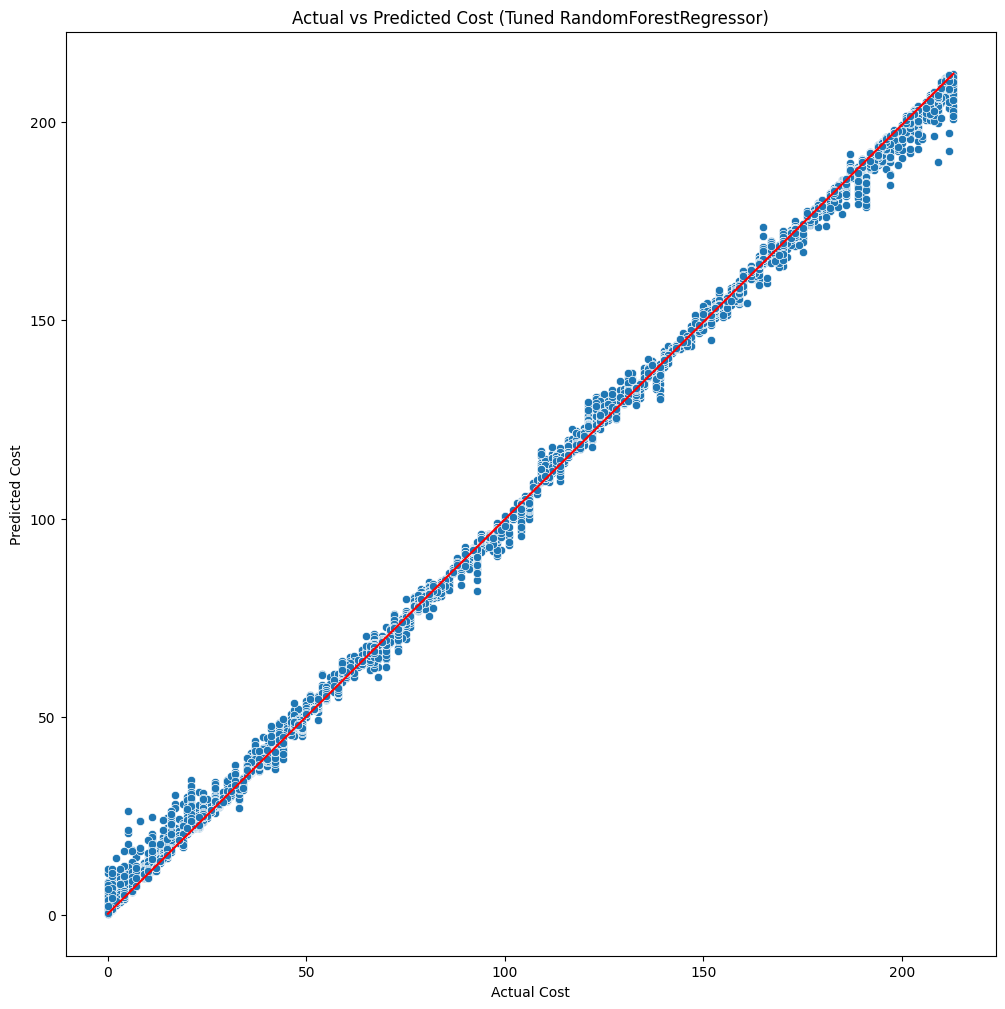

In [58]:
#Plot actual vs predicted for the tuned RandomForestRegressor
plt.figure(figsize=(12, 12))
sns.scatterplot(x=df_results['Actual'], y=df_results['Predicted'], alpha=1)
plt.plot([min(df_results['Actual']), max(df_results['Actual'])], [min(df_results['Predicted']), max(df_results['Predicted'])], color='red')
plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')
plt.title('Actual vs Predicted Cost (Tuned RandomForestRegressor)')
plt.show()

Hasil dari scatter plot ini menunjukkan bahwa model Random Forest Regressor yang telah di-tuning bekerja dengan sangat baik, karena prediksi dan nilai sebenarnya berada dalam jangkauan yang sangat dekat satu sama lain. Model memiliki tingkat keakuratan yang tinggi dalam memprediksi biaya akuisisi pelanggan.

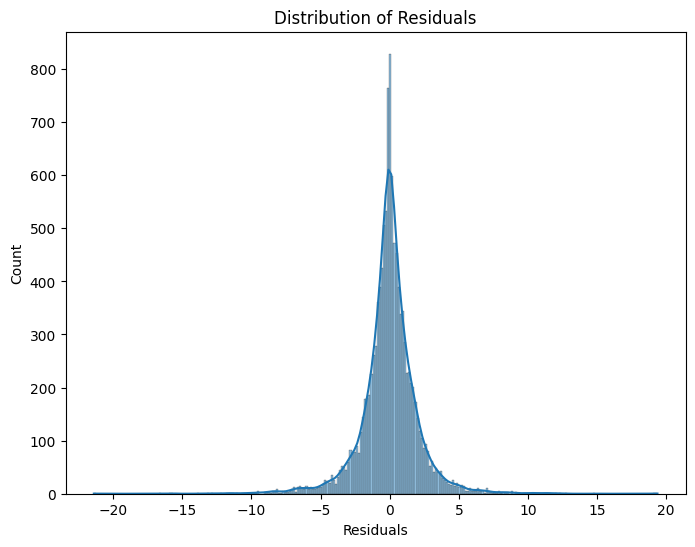

In [56]:
residuals = y_test - y_pred_forest_tuned
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.show()

Dapat dilihat bahwa residual tampak mengikuti distribusi yang sangat simetris, ini menunjukkan bahwa model memprediksi dengan sangat baik di banyak kasus. Karena distribusi terpusat pada 0 dapat disimpulkan bahwa rata-rata error atau residual dari model ini sangat kecil. Dengan kata lain, model tidak terlalu bias, baik ke arah over-prediction maupun under-prediction.

# Conclution

Model machine learning telah berhasil dikembangkan untuk memprediksi biaya yang diperlukan untuk mengakuisisi pelanggan di Amerika Serikat dengan menggunakan algoritma Random Forest Regressor. Model ini menunjukkan hasil yang sangat memuaskan dengan nilai R-squared sebesar 0,999, yang berarti model dapat menjelaskan 99,9% variansi dalam data. Selain itu, model juga mencapai Mean Squared Error (MSE) sebesar 4,39 dan Root Mean Squared Error (RMSE) sebesar 2,09, menunjukkan bahwa kesalahan prediksi rata-rata hanya sekitar 2,09 unit.

Hasil ini menunjukkan bahwa model sangat efektif dalam memberikan estimasi biaya akuisisi pelanggan, sehingga dapat diandalkan untuk pengambilan keputusan strategis dalam bisnis. Dengan kinerja yang tinggi, model ini memiliki potensi untuk diimplementasikan dalam praktik untuk meningkatkan efisiensi dalam proses akuisisi pelanggan.